## LEARNING OBJECTIVES

After this lesson, you will be able to:

* Use metrics to describe the composition of a cluster
* Evaluate the results of a K-Means Clustering Analysis

#### Quick review of K-Means:
* Clusters data by trying to separatesamples into n groups of equal variance minimizing inertia
* Algorithm requires the number of clusters to be specified

The algorithm works like so:  
* The first step chooses the initial centroids, with the most basic method being to choose k samples from the dataset X. 
* After initialization, K-means consists of looping between the two other steps:
    * The first step assigns each sample to its nearest centroid. 
    * The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

#### To the internets!

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In the example above, how do we define what is a "good" or "bad" cluster?

The key to understanding your clustering analysis are the visual evaluation of your clusters, and the computation of metrics that can measure how good your analysis is and how to interpret it. In the following sections, we'll look at a few common methods for understanding and validating your analysis.

Our evaluation of the clusters should look at whether the separations of the data are similar to some ground truth set of classes or if they satisfy some assumption such that members belong to the same class are more similar that members of different classes according to some similarity metric.

#### Visualization

When evaluating clusters, the first and easiest method is to visually examine the output of the clustering algorithm. After we run the algorithm and calculate the centroids as we did in the previous lesson, we can plot the resulting clusters to see where the centroids are based and how the clusters are grouping.

<img src = 'assets/plot.png'>

## Guided Practice: Perform a K-Means Analysis and Evaluate the Clusters

K-Means can be used as a supervised, semi-supervised and unsupervised learning technique.  

Remember:

Classification: "What is this observation most like?"

Clustering: "Where can I draw separating boundries that will best help me understand my data?"  



In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### Here's your prompt:

James Cameron went deep, deep, deep sea diving and took a sample of all the fish down there. Unfortunately, James could not 'sea' any of the fish and had to rely on laser measurements (not because it was dark, but because Avatar 2 was so majestic it blinded him for life, like staring into the sun).   

He had to go attend some film festival so he left if up to you to determine how many species of fish were observed in the depths of the ocean.   

In [2]:
fish = pd.read_csv('assets/data/fish_u.csv')
fish.drop('Unnamed: 0',axis =1, inplace = True)
fish.head(3)

,caudal_fin,dorsal_fin,pec_fin,gill
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


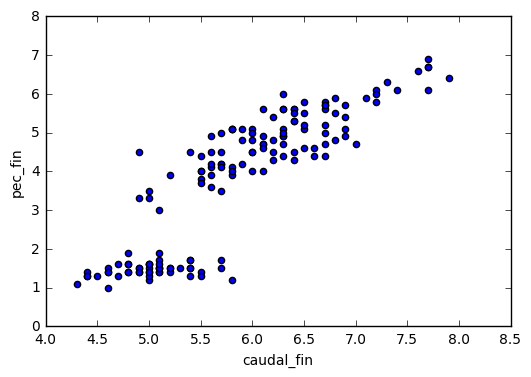

In [3]:
# As an Fishologist you know that the Caudal Fin Length and Pectoral Fin Length are highly predictive of fish species.
fish.plot(kind = 'scatter', x ='caudal_fin',y ='pec_fin')

There definitely appears to be a single class which stands out from the rest of this data.


We can draw 3/4 straight lines throught the rest of the data to chop it up into 4 or 5 more groups, or we can leave it as is.


<img src = assets/images/wnb.jpeg>

Lets run our K-Means with both a K of 2 and a K of 5

Step 3: Perform a K-Means test

#### Step 3: Perform a K-Means test

First, let's define the columns. We're going to using "quality" to define class as "y" and the rest of our variables as "x."



In [4]:
# As K Means is an unsupervised, having a Y is not necessary for anything but evaluating.
X = fish

In [5]:
k = 2
kmeans2 = KMeans(n_clusters=k)
kmeans2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
k = 4
kmeans4 = KMeans(n_clusters=k)
kmeans4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
k = 6
kmeans6 = KMeans(n_clusters=k)
kmeans6.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now, let's get the labels and centroids

In [10]:
labels2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

labels4 = kmeans4.labels_
centroids4 = kmeans4.cluster_centers_


labels6 = kmeans6.labels_
centroids6 = kmeans6.cluster_centers_
# and print the labels to take a look at what our predicted classes are.

print labels2
print centroids2
print # Blank space
print labels4
print centroids4
print # Blank space
print labels6
print centroids6

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[[ 5.00566038  3.36981132  1.56037736  0.29056604]
 [ 6.30103093  2.88659794  4.95876289  1.69587629]]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 0 0 0 2 0 0 0 3
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 3 3
 0 3]
[[ 6.9125      3.1         5.846875    2.13125   ]
 [ 5.006       3.428       1.462       0.246     ]
 [ 5.53214286  2.63571429  3.96071429  1.22857143]
 [ 6.2525      2.855       4.815       1.625     ]]

[5 1 1 1 5 5 1 5 1 1 5 1 1 1 5 5 5 5 5 5 5 5 1 5 1 1 5 5 5 1 1 5 5 5 1 1 5
 5 

These labels and centroids are those after the final iteration. We are used to looking at the centroids in 2 dimensions, but in this example we have 4 features we are compairing, that is why each centroid has 4 coordinates associated with it.


##### Step 4: Evaluate the clusters
Lets compute the silhouette scores:


What is a silhouette score?

#### Silhouette Score/Coefficient

The silhouette score, or silhouette coefficient, is the measure of how closely related a point is to members of its cluster rather than members of other clusters. If the resulting score is high, then the clustering analysis has an appropriate number of clusters. If the score is low, there are either too many or too few clusters.


* The best value is 1 and the worst value is -1
* Negative values generally indicate that several of the observations in a cluster have been assigned to the wrong cluster, as a different cluster is more similar.

Silhouette Algorithm

<img src="assets/images/silh.png">  

a: The mean distance between an observation and all other points in the same class.  

b: The mean distance between an observation and all other points in the next nearest cluster.  


In [11]:
silhouette_score(X, labels2 ,metric='euclidean')

0.68104616921174665

In [12]:
silhouette_score(X, labels4 ,metric='euclidean')

0.49805050499728803

In [13]:
silhouette_score(X, labels6 ,metric='euclidean')

0.36483400396700366

###### Ok, but what about the Visualization???

('For n_clusters =', 2, 'The average silhouette_score is :', 0.68104616921174665)


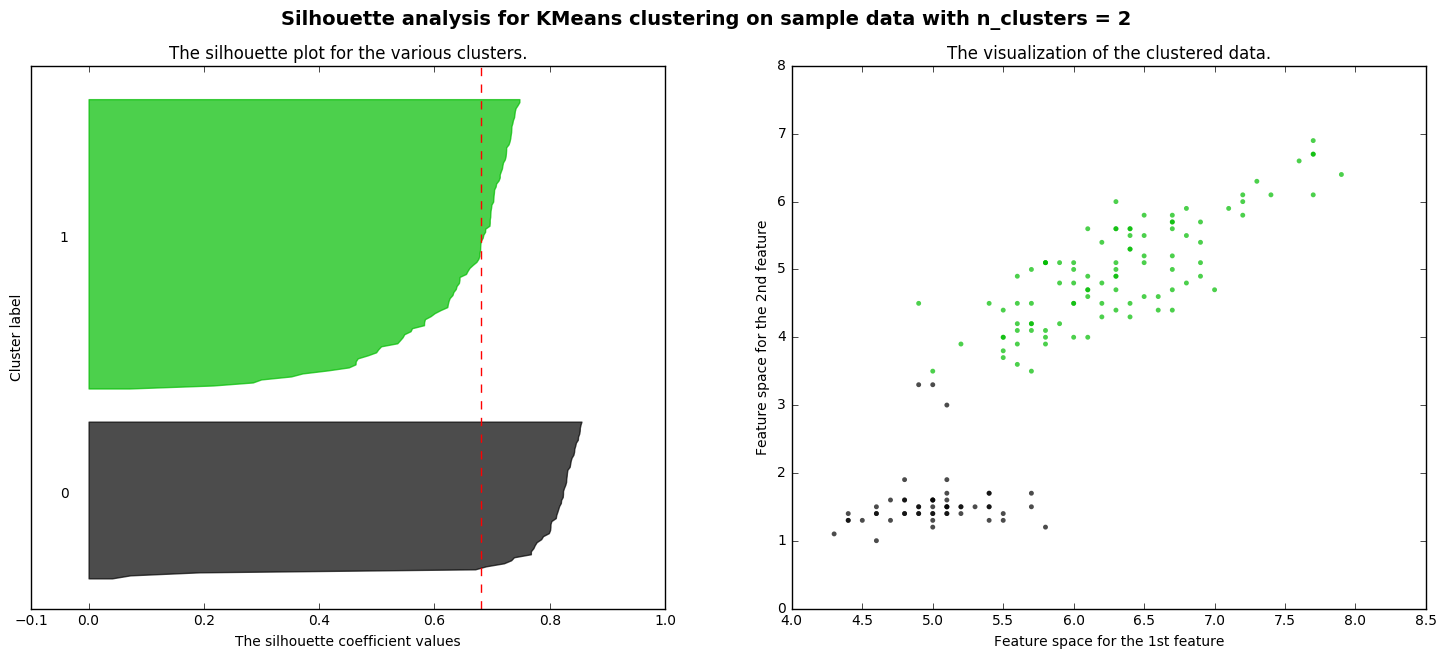

('For n_clusters =', 4, 'The average silhouette_score is :', 0.49805050499728803)


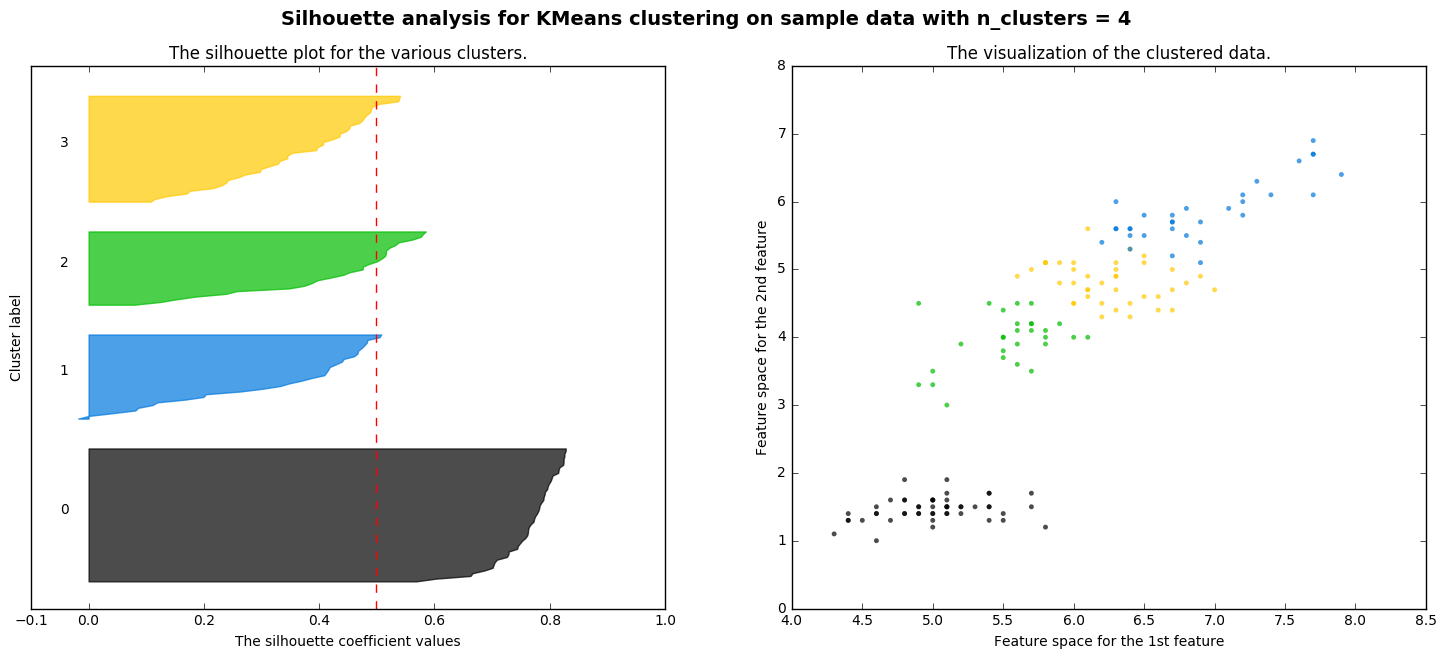

('For n_clusters =', 6, 'The average silhouette_score is :', 0.36784649847122541)


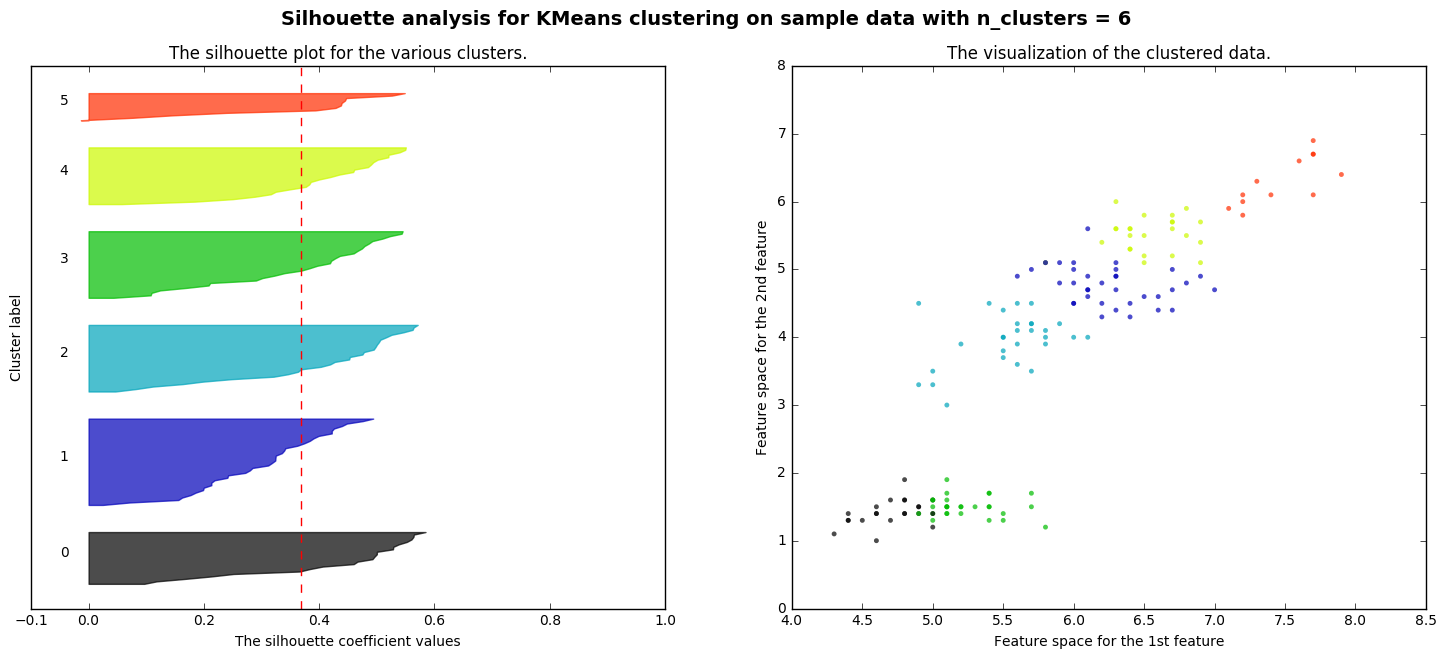

In [15]:
##I took this straight from sklearn
range_n_clusters = [2, 4, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['caudal_fin'], X['pec_fin'], marker='.', s=50, lw=0, alpha=0.7,
                c=colors)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Might as well create a function to do all values of K

In [16]:
# Metric, K values and dataframe to append to
from sklearn.metrics import silhouette_score
kays = [2,3,4,5,6,7,8,9]
results = pd.DataFrame(columns = ['k','silhouette_score'])

for k_item in kays:
    # Sets model for each K value
    kmeans_k = KMeans(n_clusters=k_item)
    # fits model
    kmeans_k.fit(X)

    # Get labels for model evaluation.  Centroids if we want to use those later.
    labels_k = kmeans_k.labels_
    centroids_k = kmeans_k.cluster_centers_

    # Calculates Silhouette score.
    s_k = silhouette_score(X, labels_k ,metric='euclidean')
    # Appends information to results DF
    results.loc[len(results)] = [k_item, s_k]
results

,k,silhouette_score
0,2.0,0.681046
1,3.0,0.552819
2,4.0,0.498051
3,5.0,0.488749
4,6.0,0.364834
5,7.0,0.357156
6,8.0,0.348735
7,9.0,0.320917


Silhouette Score is a useful metric for unsupervised learning, but there is more than one way to skin a cat.
Traditional supervised clustering evaluations include, but are not limited too:

- Accuracy Score
- Confusion Matrix
- Classification Reports  

Some new ways to skin a clustering cat:  

- Completeness Score
- Homogeneity
- V Measure Score
- Mutual Information Score

##### Completeness Score- All members of a given class are assigned to the same cluster.

* A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. (If a cluster contains all of the data points of a single class.)
* Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling

##### Homogeneity: each cluster contains only members of a single class.  
* A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. (Every cluster is composed of data points from only 1 class. Essentually there are representative of a class)   

* Score between 0.0 and 1.0. 1.0 stands for perfectly homogeneous labeling

##### V Measure Score

The V-measure is the harmonic mean between homogeneity and completeness:  

v = 2 * (homogeneity x completeness) / (homogeneity + completeness)

#### To the docs!

http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## Conclusion:

* There are numerous methods for evaluating your clustering analysis (how many can you recall?)
* After analyzing clusters, you may have to go back and tune the value of "k" in your analysis
* Always examine multiple metrics to understand how our analysis performed